In [41]:
import typing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import QuantLib as ql
import yfinance as yf
import pandas_market_calendars as mcal
import datetime
import time
import pathlib as Path
import os

# Self-written modules
from yq.scripts import models
from yq.scripts import heston_func
from yq.utils import option
from yq.utils import calendar
from sc import constants as cs



# Fetch stock data

[*********************100%%**********************]  2 of 2 completed


,LONN.SW,SIKA.SW
Date,,
2023-10-16,426.100006,235.000000
2023-10-17,357.299988,222.199997
2023-10-18,344.700012,216.300003
2023-10-19,342.000000,218.199997
2023-10-20,332.899994,217.000000
2023-10-23,327.600006,215.899994
2023-10-24,330.899994,215.699997
2023-10-25,315.000000,212.000000
2023-10-26,315.899994,211.199997


331.3999938964844

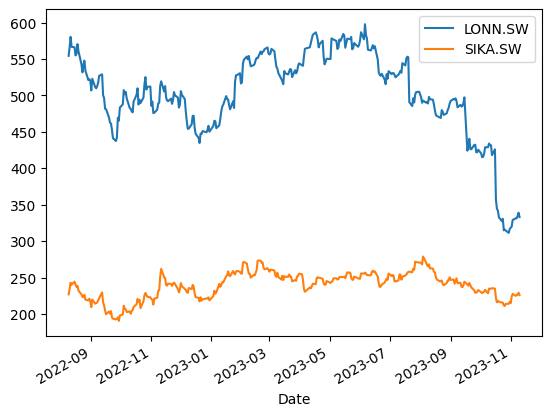

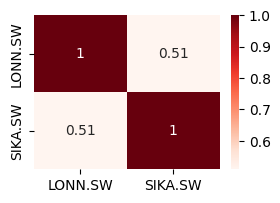

In [2]:
historical_start_date = '2022-08-09'
# Define the ticker list
ticker_list = ['LONN.SW', 'SIKA.SW']

# Fetch the data
data = yf.download(ticker_list, historical_start_date)['Adj Close'] # Auto adjust is false
display(data.tail(20))
data.plot()
display(data.loc['2023-11-07']['LONN.SW'])

plt.figure(figsize=(3,2))
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

In [3]:
params = {
    'data': data,
    'ticker_list': ['LONN.SW', 'SIKA.SW']
}
trading_calendar = calendar.SIXTradingCalendar()
gbm = models.PricingModel(params = params)

Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))


In [39]:
start_time = time.time()

start_time_str = time.strftime('%Y%m%d_%H%M%S_%f', time.localtime(start_time))



end_time = time.time()
elapsed_time = end_time - start_time
min, sec = divmod(elapsed_time, 60)
print(f"The elapsed time is {int(min)} minutes, {int(sec)} seconds")


The elapsed time is 0 minutes, 0 seconds


In [4]:
bus_date_range = trading_calendar.create_six_trading_dates('2023-08-09', '2023-08-09')
# display(bus_date_range)
# print(bus_date_range.index.to_list())

for product_est_date in bus_date_range.index:
    try:
        for sim in range(2):
            sim_start_date = trading_calendar.add_trading_day(product_est_date, 1)
            
            sim_data = gbm.multi_asset_gbm(
                sim_start_date=sim_start_date, 
                hist_window=252, 
                sim_window=trading_calendar.calculate_business_days(sim_start_date, cs.FINAL_FIXING_DATE), 
                h_adjustment=0)

            
            sim_data.to_csv

        display(sim_data)
        sim_data.plot()
    except Exception as e:
        # Log the error with the date that caused it
        raise Exception("MultiGBM has error.")
    
    
    # TODO: Tag the sim_data with the dates
    # TODO: Add the concate the yfinance data from initial fixing date to the sim_data
    # TODO: Break the df into 2 df, each with date as one of the columns (not the index) for sc payoff function
    # Get the data?

    
    # TODO: Store the payoff df to the class and plot?

# TODO: Implement the second simulation with the control variate method? Another loop or same loop?

# sim_data.columns = ["simulated_" + ticker for ticker in ticker_list]

# A dataframe with both validation data and simulated data


Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
909
910
Covariance matrix is:
 [[0.00039744 0.00023186]
 [0.00023186 0.00042921]]

The shape is (2, 2)

Correlation between the two var is 0.561365644897236
The matrix after Cholesky decomposition is:
 [[0.01993589 0.        ]
 [0.01163006 0.01714509]]

The multiplication of L and L transpose is:
 [[0.00039744 0.00023186]
 [0.00023186 0.00042921]]

Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'

,LONN.SW,SIKA.SW
Date,,
2023-08-10,492.858039,262.248888
2023-08-11,501.688866,261.252615
2023-08-14,508.809597,256.276293
2023-08-15,522.143774,263.505604
2023-08-16,539.060868,268.729538
...,...,...
2024-07-24,949.916866,470.627107
2024-07-25,948.478206,465.201548
2024-07-26,962.921445,477.038683


In [5]:
heston = models.PricingModel(params = params)

# Change sim_window

bus_date_range = trading_calendar.create_six_trading_dates('2023-08-09', '2023-08-09')
# display(bus_date_range)
# print(bus_date_range.index.to_list())
for product_est_date in bus_date_range.index:
    try:
        sim_start_date = trading_calendar.add_trading_day(product_est_date, 1)
        sim_data = heston.multi_asset_heston_model(
            sim_start_date= sim_start_date, 
            hist_window=63,
            sim_window=252, h_adjustment=[0, 0])
        # display(sim_data)
    except Exception as e:
        # Log the error with the date that caused it
        raise Exception("Heston has error.")
    sim_data.plot()


Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
909
910
S_0_vector is [489.0, 265.5]

/Users/tangyiqwan/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/ntu/Acads/4_Y4S1/MH4518/group-project/code/simulation-in-finance
/Users/tangyiqwan/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/ntu/Acads/4_Y4S1/MH4518